In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## P9.3 [1 point]

In [ ]:
def simulate_random_walk(
    graph: nx.Graph,
    start_node: int,
    steps: int = 10_000
) -> np.ndarray:

    adjacency_matrix = nx.to_numpy_array(graph)
    
    transition_matrix = adjacency_matrix / adjacency_matrix.sum(axis=1, keepdims=True)  

    num_nodes = len(graph.nodes)
    visits = np.zeros(num_nodes)
    current_node = start_node

    for _ in range(steps):
        visits[current_node] += 1
        current_node = np.random.choice(num_nodes, p=transition_matrix[current_node])

    ergodic_density = visits / steps
    return ergodic_density


In [9]:
graph = nx.erdos_renyi_graph(n=5, p=0.5, seed=42, directed=True)

start_node = 0
ergodic_density = simulate_random_walk(graph, start_node)

print("Ergodic Density (via random walk):", ergodic_density)
print("Transition Matrix:")
print(nx.to_numpy_array(graph))


Ergodic Density (via random walk): [0.267  0.1561 0.0891 0.2439 0.2439]
Transition Matrix:
[[0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0.]]


## P9.5 [1.5 points]

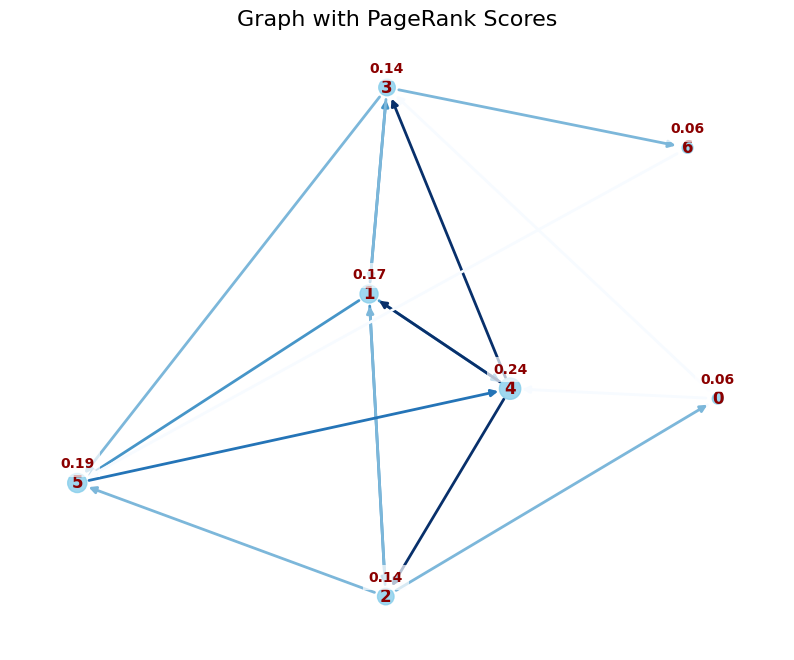

In [13]:

def compute_pagerank_nx(
        graph: nx.Graph,
        alpha: float = 0.85,
        max_iter: int = 100,
        tol: float = 1e-6
        ) -> dict:
    pagerank = nx.pagerank(graph, alpha=alpha, max_iter=max_iter, tol=tol)
    return pagerank


def draw_network_with_pagerank_values(
        graph: nx.Graph,
        pagerank: dict
        ) -> None:
    plt.figure(figsize=(10, 8))
    
    pos = nx.spring_layout(graph, seed=42)
    
    node_sizes = [1000 * pagerank[node] for node in graph.nodes]
    
    edges = graph.edges()
    edge_colors = [pagerank[u] for u, v in edges]
    
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, width=2, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(graph, pos, font_weight='bold', font_size=12, font_color='darkred')
    
    for node, (x, y) in pos.items():
        plt.text(x, y + 0.05, s=f"{pagerank[node]:.2f}", bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                 horizontalalignment='center', fontsize=10, fontweight='bold', color='darkred')
    
    plt.title("Graph with PageRank Scores", fontsize=16)
    plt.axis('off')
    plt.show()


G = nx.erdos_renyi_graph(n=7, p=0.5, seed=42, directed=True)

pagerank_values = compute_pagerank_nx(G)

draw_network_with_pagerank_values(G, pagerank_values)


## P9.6 [3.5 points]

Fastest Diffusion Graph Found!
Second-Largest Eigenvalue (Fastest Diffusion Rate): 0.7041057799555384
Transition Matrix of the Best Graph:
[[0.         0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.5        0.         0.         0.         0.5        0.        ]
 [0.         0.         0.5        0.         0.         0.5       ]
 [0.         0.         1.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


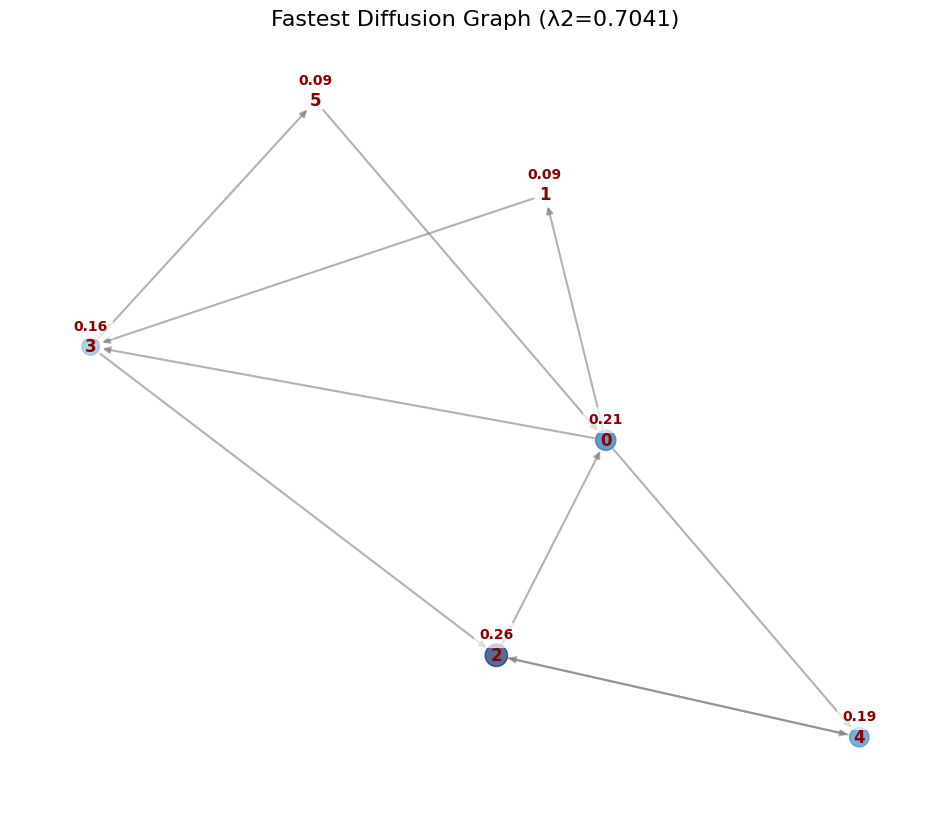

In [ ]:
def calculate_second_eigenvalue(transition_matrix):
    """
    Calculate the second-largest eigenvalue of the transition matrix.
    """
    eigenvalues = np.linalg.eigvals(transition_matrix)
    # Sort eigenvalues by their absolute values
    sorted_eigenvalues = sorted(np.abs(eigenvalues), reverse=True)
    # Return the second-largest eigenvalue
    return sorted_eigenvalues[1]


def create_transition_matrix(graph: nx.Graph) -> float:
    """
    Create a transition matrix from a given graph.
    """
    adjacency_matrix = nx.to_numpy_array(graph)
    return adjacency_matrix / adjacency_matrix.sum(axis=1, keepdims=True)


def find_fastest_diffusion_graph(
        vertices,
        edges,
        num_graphs: int = 10
        ) -> tuple:
    """
    Generate random graphs and find the one with the smallest second eigenvalue
    """
    best_graph = None
    fastest_diffusion_rate = float('inf')
    best_transition_matrix = None

    for _ in range(num_graphs):
        graph = nx.gnm_random_graph(vertices, edges, directed=True)

        if not nx.is_strongly_connected(graph):
            continue

        transition_matrix = create_transition_matrix(graph)

        second_eigenvalue = calculate_second_eigenvalue(transition_matrix)

        if second_eigenvalue < fastest_diffusion_rate:
            fastest_diffusion_rate = second_eigenvalue
            best_graph = graph
            best_transition_matrix = transition_matrix

    return best_graph, fastest_diffusion_rate, best_transition_matrix


def draw_graph_with_diffusion(graph, title: str, pagerank: dict):
    """
    Draw the graph with diffusion-related visual enhancements.
    """
    plt.figure(figsize=(12, 10))
    
    # Calculate node sizes based on PageRank values
    node_sizes = [1000 * pagerank[node] for node in graph.nodes]
    
    # Color nodes based on PageRank values (from blue to red)
    node_colors = [pagerank[node] for node in graph.nodes]
    
    # Generate positions using the spring layout
    pos = nx.spring_layout(graph, seed=42)
    
    # Draw nodes and edges
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color=node_colors, cmap=cm.Blues, alpha=0.7)
    nx.draw_networkx_edges(graph, pos, edge_color='gray', width=1.5, alpha=0.6)
    
    # Draw labels
    nx.draw_networkx_labels(graph, pos, font_size=12, font_color='darkred', font_weight='bold')
    
    # Display PageRank values on top of the nodes
    for node, (x, y) in pos.items():
        plt.text(
            x, y + 0.05, 
            s=f"{pagerank[node]:.2f}", 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
            horizontalalignment='center', fontsize=10, fontweight='bold', color='darkred'
        )
    
    # Set title and remove axes
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()


# Main execution
vertices = 6
edges = 10
num_graphs_to_generate = 20

# Find the graph with the fastest diffusion rate
best_graph, fastest_rate, best_transition_matrix = find_fastest_diffusion_graph(vertices, edges, num_graphs_to_generate)

if best_graph is not None:
    print("Fastest Diffusion Graph Found!")
    print("Second-Largest Eigenvalue (Fastest Diffusion Rate):", fastest_rate)
    print("Transition Matrix of the Best Graph:")
    print(best_transition_matrix)
    
    # Compute PageRank for visualization
    pagerank_values = nx.pagerank(best_graph, alpha=0.85)
    
    # Draw the graph with the PageRank-based visualization
    draw_graph_with_diffusion(
        best_graph, 
        f"Fastest Diffusion Graph (λ2={fastest_rate:.4f})", 
        pagerank_values
    )
else:
    print("No suitable graph found!")
